<a href="https://colab.research.google.com/github/sw-woo/aiffel-test/blob/master/_10_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*6*6,120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1

    for s in size:
      num_features *= s

    return num_features

net =Net()

print(net)

  


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## 데이터 생성 및 회귀식 설정

Text(0.5, 0, 'x')

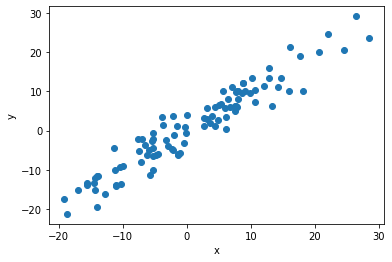

In [5]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

## 신경망 구성

In [6]:
# nn.Module은 사용자 정의 모듈을 생성하는데 있어서 가장 기초가 되는 모듈이다.
class LR(nn.Module):

  # linear regression의 입력값과 출력값 갯수를 받는다.
  def __init__(self, input_size, output_size):
    super().__init__()
    # nn.Linear를 상속받는다.
    self.linear = nn.Linear(input_size, output_size)

  # 정방향 호출 함수. 이 함수를 통해서 linear regression을 수행하게 된다.
  def forward(self, x):
    pred = self.linear(x)
    return pred

## 모델 생성 및 파라미터 확인

In [7]:
# random seed
torch.manual_seed(1)
# 입력값이 한개고, 출력값이 한개
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


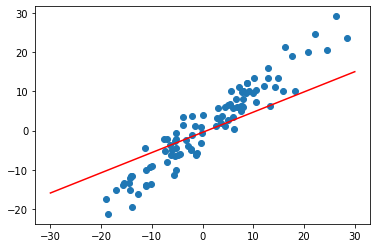

In [9]:
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title = title
  # weight 와 bias
  w1, b1 = get_params()
  # -30 부터 30까지
  x1 = np.array([-30, 30])
  # 선형 추정선을 그려본다.
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')

## 손실함수와 옵티마이저

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

## 모델 학습

In [21]:
# 100 회 반복
epochs = 100
losses = []
for i in range(epochs):
  # 예측
  y_pred = model.forward(X)
  # 오차 계산
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  # 오차 누적 (계산을 위해서)
  losses.append(loss)
  # optimzer 초기화
  optimizer.zero_grad()
  # backward를 수행하여 그래디언트 계산
  loss.backward()
  # learning rate 만큼 가중치를 주어서 hyper parameter 업데이트
  optimizer.step()

epoch: 0 loss: 9.612442970275879
epoch: 1 loss: 9.612438201904297
epoch: 2 loss: 9.612435340881348
epoch: 3 loss: 9.612431526184082
epoch: 4 loss: 9.612428665161133
epoch: 5 loss: 9.61242389678955
epoch: 6 loss: 9.612421035766602
epoch: 7 loss: 9.612417221069336
epoch: 8 loss: 9.612414360046387
epoch: 9 loss: 9.612410545349121
epoch: 10 loss: 9.612407684326172
epoch: 11 loss: 9.612403869628906
epoch: 12 loss: 9.612401008605957
epoch: 13 loss: 9.612398147583008
epoch: 14 loss: 9.612395286560059
epoch: 15 loss: 9.61239242553711
epoch: 16 loss: 9.612387657165527
epoch: 17 loss: 9.612384796142578
epoch: 18 loss: 9.612381935119629
epoch: 19 loss: 9.612378120422363
epoch: 20 loss: 9.612375259399414
epoch: 21 loss: 9.612371444702148
epoch: 22 loss: 9.6123685836792
epoch: 23 loss: 9.612364768981934
epoch: 24 loss: 9.612361907958984
epoch: 25 loss: 9.612359046936035
epoch: 26 loss: 9.612356185913086
epoch: 27 loss: 9.612353324890137
epoch: 28 loss: 9.612350463867188
epoch: 29 loss: 9.6123476028

## 시각화

Text(0.5, 0, 'epoch')

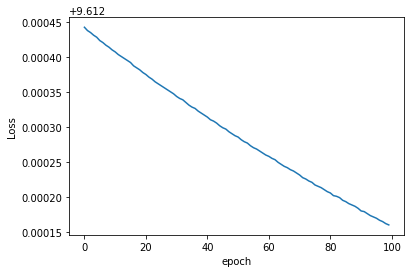

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

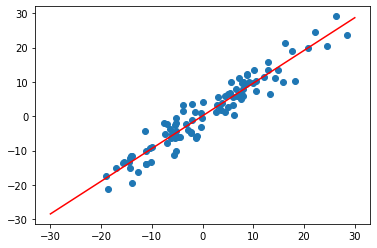

In [23]:
plot_fit("Trained Model")